In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [72]:
# Define the stock symbols
stock_symbols = ['^GSPC', '^SP500-45', '^IXIC', '^NDX', '^DJI', '^RUT']

# Define start date
start_date = '1995-01-01'

# Fetch data for each symbol and store in a dictionary
data_frames = {symbol: yf.download(symbol, start=start_date)['Adj Close'] for symbol in stock_symbols}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data_frames)

# Reset index to make 'Date' a column
df.reset_index(inplace=True)

# Rename columns to match the assignment requirements
df.columns = ['Date', 'SP500', 'SPINFO', 'NASCOMP', 'NAS100', 'DJIA', 'RUS2000']

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,SP500,SPINFO,NASCOMP,NAS100,DJIA,RUS2000
0,1995-01-03,459.109985,99.035217,743.580017,398.000000,3838.479980,247.240005
1,1995-01-04,460.709991,99.365196,745.840027,399.649994,3857.649902,247.649994
2,1995-01-05,460.339996,99.165207,745.659973,398.019989,3850.919922,247.460007
3,1995-01-06,460.679993,100.215157,749.690002,401.589996,3867.409912,248.080002
4,1995-01-09,460.829987,100.925125,752.090027,403.529999,3861.350098,248.369995


In [73]:
# normalized all the prices
test_df = df.set_index('Date')

base_values = test_df.iloc[0]

# Step 2: Normalize all index values relative to the base
df_norm = (test_df / base_values) * 100

# back to the 'Date' column
df_norm = df_norm.reset_index()

# Print the normalized DataFrame
df_norm

,Date,SP500,SPINFO,NASCOMP,NAS100,DJIA,RUS2000
0,1995-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1995-01-04,100.348502,100.333194,100.303936,100.414571,100.499414,100.165826
2,1995-01-05,100.267912,100.131256,100.279722,100.005022,100.324085,100.088983
3,1995-01-06,100.341968,101.191434,100.821698,100.902009,100.753682,100.339749
4,1995-01-09,100.374638,101.908319,101.144465,101.389447,100.595812,100.457042
...,...,...,...,...,...,...,...
7309,2024-01-16,1038.091118,3464.605850,2009.783650,4228.821844,973.331144,779.525969
7310,2024-01-17,1032.260267,3447.369735,1997.850907,4205.095301,970.870555,773.810873
7311,2024-01-18,1041.349588,3517.395182,2024.751882,4266.906800,976.131426,778.049661
7312,2024-01-19,1054.172249,3599.941575,2059.088380,4350.251256,986.426944,786.438267


In [74]:
# restrict the date range 1995 - 2002
df_norm_bubble = df_norm[df_norm.Date <= '2002-12-31']
df_norm_bubble.tail()

,Date,SP500,SPINFO,NASCOMP,NAS100,DJIA,RUS2000
2010,2002-12-24,194.391322,230.726005,184.575962,257.108035,220.089994,156.981066
2011,2002-12-26,193.779269,229.039738,183.960029,255.391965,219.686188,157.498781
2012,2002-12-27,190.673271,226.081186,181.326828,250.716074,216.329910,155.379386
2013,2002-12-30,191.542341,223.213523,180.147396,248.716084,217.087223,154.598771
2014,2002-12-31,191.635999,222.314853,179.605420,247.329145,217.315967,154.946606


In [75]:
# Calculate the ratio data

# informaiton sector / all sectors in SP500
#  how valuable the information sector was compared to the whole sector.
df_norm_bubble['SPINFO/SP500'] = df_norm_bubble['SPINFO'] / df_norm_bubble['SP500']
#  how valuable the information sector was compared to the industrial-led index.
df_norm_bubble['SPINFO/DJIA'] = df_norm_bubble['SPINFO'] / df_norm_bubble['DJIA']
#  how valuable the information sector was compared to the small-cap index.
df_norm_bubble['SPINFO/RUS2000'] = df_norm_bubble['SPINFO'] / df_norm_bubble['RUS2000']

# Nasdaq 100 / Nasdaq Composite
#  how top 100 companies in tech-led stock index outperformed the all index.
df_norm_bubble['NAS100/NASCOMP'] = df_norm_bubble['NAS100'] / df_norm_bubble['NASCOMP']
#  how top 100 companies in the tech-led stock index outperformed the S&P500 index.
df_norm_bubble['NAS100/SP500'] = df_norm_bubble['NAS100'] / df_norm_bubble['SP500']
#  how top 100 companies in the tech-led stock index outperformed the industrials-led Dow Jones index
df_norm_bubble['NAS100/DJIA'] = df_norm_bubble['NAS100'] / df_norm_bubble['DJIA']
#  how top 100 companies in the tech-led stock index outperformed the small-cap-led Russell 2000.
df_norm_bubble['NAS100/RUS2000'] = df_norm_bubble['NAS100'] / df_norm_bubble['RUS2000']

df_norm_bubble.head()

C:\Users\runru\AppData\Local\Temp\ipykernel_16408\3663723933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_bubble['SPINFO/SP500'] = df_norm_bubble['SPINFO'] / df_norm_bubble['SP500']
C:\Users\runru\AppData\Local\Temp\ipykernel_16408\3663723933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_bubble['SPINFO/DJIA'] = df_norm_bubble['SPINFO'] / df_norm_bubble['DJIA']
C:\Users\runru\AppData\Local\Temp\ipykernel_16408\3663723933.py:9: SettingWithCopyWarning: 
A value is trying to be set 

,Date,SP500,SPINFO,NASCOMP,NAS100,DJIA,RUS2000,SPINFO/SP500,SPINFO/DJIA,SPINFO/RUS2000,NAS100/NASCOMP,NAS100/SP500,NAS100/DJIA,NAS100/RUS2000
0,1995-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1995-01-04,100.348502,100.333194,100.303936,100.414571,100.499414,100.165826,0.999847,0.998346,1.001671,1.001103,1.000658,0.999156,1.002483
2,1995-01-05,100.267912,100.131256,100.279722,100.005022,100.324085,100.088983,0.998637,0.998078,1.000422,0.997261,0.997378,0.996820,0.999161
3,1995-01-06,100.341968,101.191434,100.821698,100.902009,100.753682,100.339749,1.008466,1.004345,1.008488,1.000797,1.005581,1.001472,1.005604
4,1995-01-09,100.374638,101.908319,101.144465,101.389447,100.595812,100.457042,1.015280,1.013047,1.014447,1.002422,1.010110,1.007889,1.009282


In [77]:
#df_norm_bubble.to_csv("BI_data.csv", index=False)

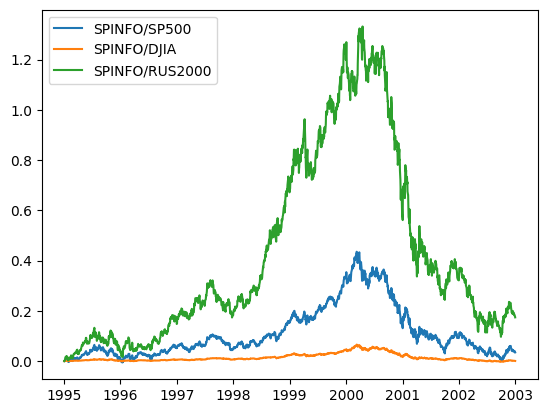

In [66]:
for data in ['SPINFO/SP500', 'SPINFO/DJIA', 'SPINFO/RUS2000']:
    plt.plot(df[df.Date <= '2002-12-31']['Date'], df[df.Date <= '2002-12-31'][data] - df[df.Date <= '2002-12-31'][data][0], label=data)

plt.legend()

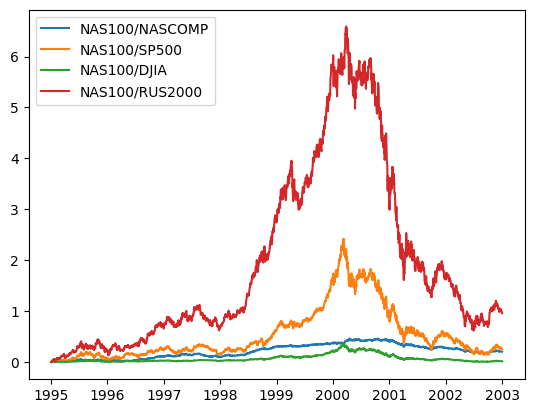

In [67]:
for data in ['NAS100/NASCOMP', 'NAS100/SP500', 'NAS100/DJIA', 'NAS100/RUS2000']:
    plt.plot(df[df.Date <= '2002-12-31']['Date'], df[df.Date <= '2002-12-31'][data] - df[df.Date <= '2002-12-31'][data][0], label=data)

plt.legend()

In [8]:
# Define the ticker symbols for the companies of interest
companies = ['MSFT', 'CSCO', 'INTC', 'ORCL', 'JAVA', 'DELL', 'IBM', 'QCOM', 'YHOO', 'AOL']
